# Task6 拓展阅读：语音识别基础知识介绍
【拓展阅读】恭喜大家顺利完成“零基础入门语音识别之食物声音识别”系列学习任务！想必大家已经对音频分类任务有了一定的了解了。但实际上一般的语音识别指的是“音频转文本”的过程，音频分类只能算语音识别领域很小的一个分支。所以本次主题主要是为大家简要介绍一下语音识别领域，供学有余力的同学进行拓展。
# 01 语音识别基础与发展
## 1.1 语音识别基础
语音识别全称为“自动语音识别”，Automatic Speech Recognition (ASR), 一般是指将语音序列转换成文本序列。语音识别最终是统计优化问题，给定输入序列O={O1,...,On}，寻找最可能的词序列W={W1,...,Wm}，即寻找使得概率P(W|O)最大的词序列。用贝叶斯公式表示为：

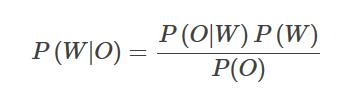

其中P(O|W) 叫做声学模型，描述的是给定词W时声学观察为O的概率；P(W)叫做语言模型，负责计算某个词序列的概率；P(O)是观察序列的概率，是固定的，是固定的，所以只看分母部分即可。

语音选择的基本单位是帧（Frame），一帧数据是由一小段语音经过ASR前端的声学特征提取模块产生的，整段语音就可以整理为以帧为单位的向量组。每帧的维度固定不变，但跨度可调，以适应不同的文本单位，比如音素、字、词、句子。

大多数语音识别的研究都是分别求取声学和语言模型，并把很多精力放在声学模型的改进上。但后来，基于深度学习和大数据的端到端（End-to-End）方法发展起来，能将声学和语言模型融为一体，直接计算P(W|O)。
## 1.2 语音识别的发展
- 传统机器学习，基于统计的GMM-HMM，其中HMM （隐马尔可夫模型，Hidden Markov Model）用来描述信号动态特性（即语音信号相邻帧间的相关性），GMM（高斯混合模型，Gaussian Mixed Model）用来描述HMM每个状态的静态特性（即HMM每个状态下语音帧的分布规律）；

- 与深度学习结合，DNN-RNN、DNN-HMM，可引入LSTM（长短期记忆网络，Long Short-Term Memory），DNN（深度学习网络，Deep Neural Networks），RNN（循环神经网络，Recurrent Neural Network）；

- 迁移学习（Transfer learning）算法、以及注意力（Attention）机制的基于语音频谱图的CNN（卷积神经网络，Convolutional Neural Network）模型的兴起。

# 02 语音识别方法
语音识别系统在长久的发展中形成了完整的流程（从前端语音信号处理，到声学模型和语言模型的训练，再到后端的解码），而深度学习方法较多地作用于声学模型和语言模型部分（或者端对端模型）。其中，前端的语音信号处理我们在task3中有所涉及，这里就不再赘述这部分了。

接下来我们将分别从“声学模型”、“语言模型”、“端到端模型”等模块简要介绍语音识别的基本实现方法。
## 2.1 声学模型
在今天的主流语音识别系统中，声学模型是一个混合(hybrid)模型，它包括用于序列跳转的隐马尔可夫模型(HMM)和根据当前帧来预测状态的深度神经网络。
### 2.1.1 HMM
隐马尔可夫模型（Hidden Markov Model，HMM）是用于建模离散时间序列的常见模型，它在语音识别中已经使用了几十年了。

HMM 涉及的主要内容有，两组序列（隐含状态和观测值），三种概率（初始状态概率，状态转移概率，发射概率），和三个基本问题（产生观测序列的概率计算，最佳隐含状态序列的解码，模型本身的训练），以及这三个问题的常用算法（前向或后向算法，Viterbi 算法，EM 算法）。语音识别的最终应用对应的是解码问题，而对语音识别系统的评估、使用也叫做解码（Decoding）。

在研究HMM之前，我们先简单的回顾一下马尔科夫链。马尔科夫链是建模随机过程的一种方法,用天气来举个简单点的例子就是，今天是否下雨和前一天是否下雨有关。

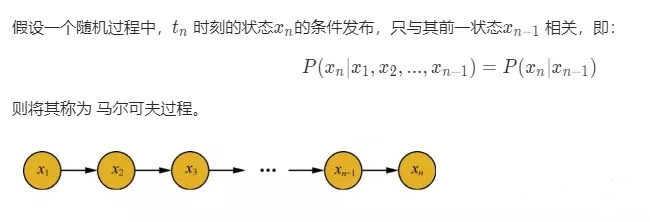

隐马尔可夫模型相当于是马尔可夫链的拓展，比如有时候我们在山洞里不能直观地知道前一天是否下雨，但我们知道前一天的湿度和今天的湿度等其他信息，通过这些已知的信息来推导未知的数据就是隐马尔可夫模型。

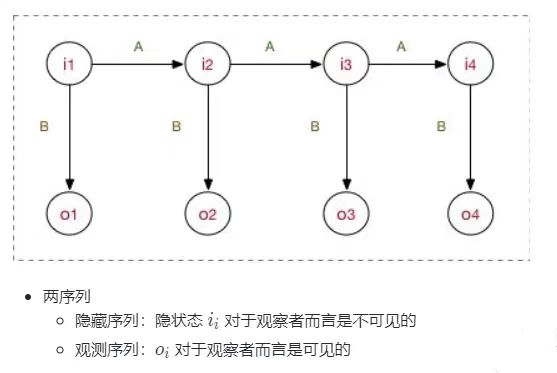

放在语音识别里就是，我们能知道语音的频谱，但不知道之前的频谱代表什么意思的，就可以通过历史的频谱，来推导新的频谱的对应结果。

### 2.1.2 GMM
GMM（高斯混合模型，Gaussian Mixed Model）,主要就是通过GMM来求得某一音素（phoneme）的概率。

在语音识别中，HMM用于建模subword级别(比如音素)的声学建模。通常我们使用3个状态的HMM来建模一个音素，它们分别表示音素的开始、中间和结束。每个状态可以跳转到自己也可以跳转到下一个状态(但是不能往后跳转)

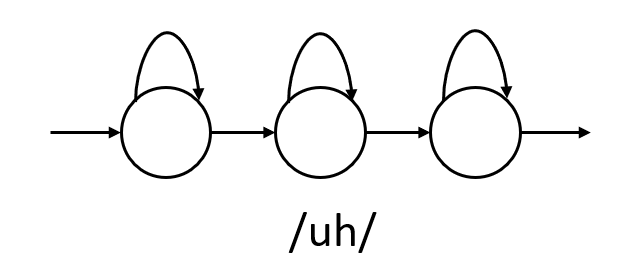

而一个词是有一个或者多个音素组成，因此它的HMM由组成它的音素的HMM拼接起来。比如下图所示，”cup”是由3个音素组成：

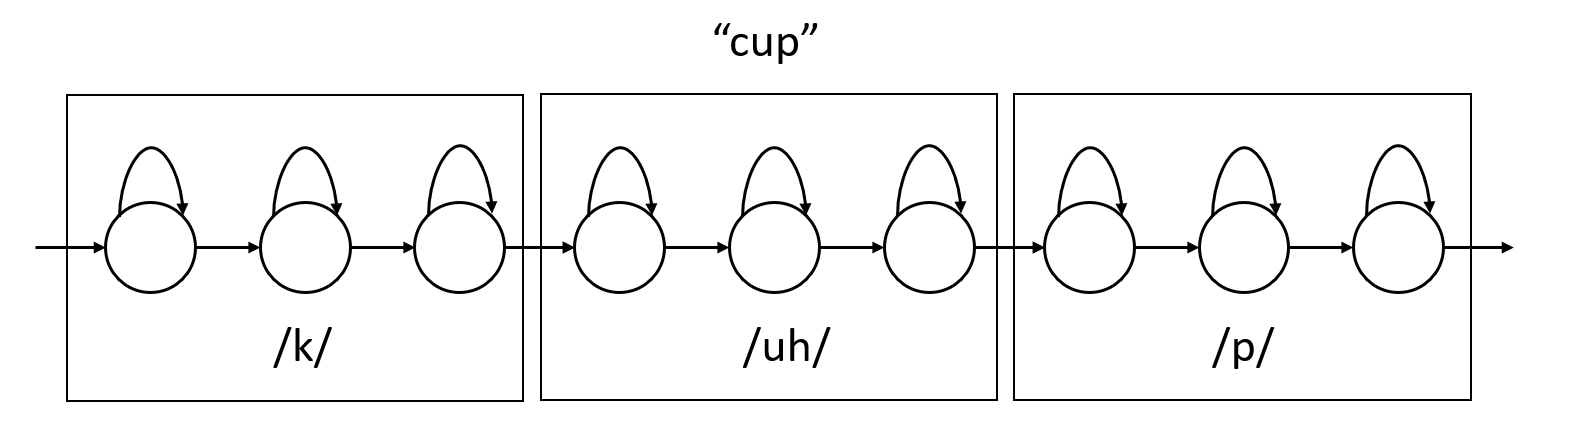

因此一个高质量的发音词典非常重要，所谓的发音词典就是定义每个词由哪些音素组成。在深度学习流行之前，HMM的发射概率通常使用GMM模型来建模：

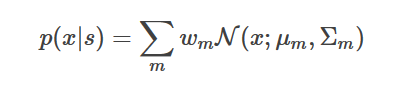

这里N(x;μm,Σm)是一个高斯分布，而wm是混合的权重，它满足∑mwm=1 。因此，每个状态都对应它自己的GMM。我们可以使用Baum-Welch在估计HMM跳转概率的同时估计所有GMM的参数，包括均值、协方差矩阵和混合的权重。

现在流行的语音系统不再使用GMM而是使用一个神经网络模型模型，它的输入是当前帧的特征向量(可能还要加上前后一些帧的特征)，输出是每个音素的概率。比如我们有40个音素，每个音素有3个状态，那么神经网络的输出是40x3=120。

这种声学模型叫做”混合”系统或者成为HMM-DNN系统，这有别于之前的HMM-GMM模型，但是HMM模型还在被使用。
## 2.2 语言模型
语言模型要解决的问题是如何计算 P(W)，常用的方法基于 n 元语法（n-gram Grammar）或RNN。

### 2.2.1 n-gram
语言模型是典型的的自回归模型（Autoregressive Model），给定词序列W=[w1,w2,...,wm]，其概率表示为:

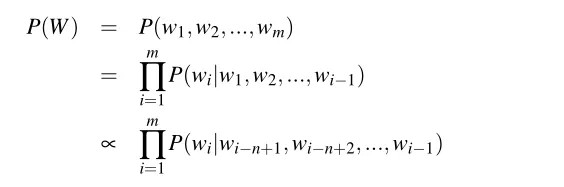

它假设当前词的出现概率只与该词之前n-1个词相关，该式中各因子需要从一定数量的文本语料中统计计算出来，此过程即是语言模型的训练过程，且需要求出所有可能的P(wi|wi−n+1, wi−n+2, ..., wi−1)，计算方法可以简化为计算语料中相应词串出现的比例关系，即:

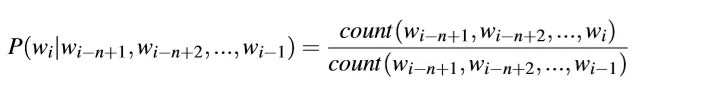

其中count表示词串在语料中出现的次数，由于训练语料不足或词串不常见等因素导致有些词串未在训练文本中出现，此时可以使用不同的平滑（Smoothing）算法进行处理。

### 2.2.2 RNN语言模型
因为当前的结果依赖于之前的信息，因此可以天然地使用单向循环神经网络进行建模。单向循环神经网络训练的常规做法是，利用句子中的历史词汇来预测当前词，下图展示了RNN 语言模型的基本结构，其输出层往往较宽，每个输出节点对应一个词，整个输出层涵盖了语言模型所使用的词表，故其训练本质上也是分类器训练，每个节点的输出表示产生该节点词的概率，即 P(wi|w1, w2, ...,wi−1)，故可以求出 P(W)。前向非循环神经网络也可以用于语言模型，此时其历史信息是固定长度的，同于n-gram。

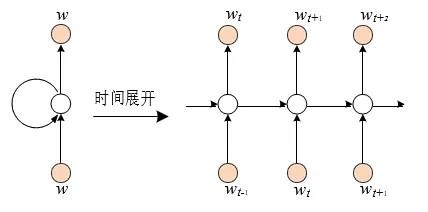

## 2.3 解码器
我们的最终目的是选择使得 P(W|O) = P(O|W)P(W) 最大的 W ，所以解码本质上是一个搜索问题，并可借助加权有限状态转换器（Weighted Finite State Transducer，WFST） 统一进行最优路径搜索.

## 2.4 基于端到端学习的方法
由于语音与文本的多变性，起初我们否决了从语音到文本一步到位的映射思路。但今天再回过头来看这个问题。假设输入是一整段语音（以帧为基本单位），输出是对应的文本（以音素或字词为基本单位），两端数据都处理成规整的数学表示形式了，只要数据是足够的，选的算法是合适的，兴许能训练出一个好的端对端模型，于是所有的压力就转移到模型上来了，怎样选择一个内在强大的模型是关键。深度学习方法是端对端学习的主要途径。
端对端学习需要考虑的首要问题也是输入输出的不定长问题。我们在这里简要介绍两种。

- CTC （连接时序分类，Connectionist temporal classification），
CTC 方法早在2006年就已提出并应用于语音识别，但真正大放异彩却是在2012年之后，随之各种CTC研究铺展开来。CTC仅仅只是一种损失函数，简而言之，输入是一个序列，输出也是一个序列，该损失函数欲使得模型输出的序列尽可能拟合目标序列。回忆语音识别系统的基本出发点，即求W∗ = argmaxw P(W|O)，其中 O= [O1, O2, O3, ...]表示语音序列，W= [w1, w2, w3, ...] 表示可能的文本序列，而端对端模型zh本身就是 P(W|O )，则CTC 的目标就是直接优化 P(W|O )，使其尽可能精确。之前需要语音对齐到帧，用这个就可以不需要对齐，它只会关心预测输出的序列是否和真实的序列是否接近（相同）。
  
- Attention
Attention模型的基本表述可以这样理解成： 当我们人在看一样东西的时候，我们当前时刻关注的一定是我们当前正在看的这样东西的某一地方，换句话说，当我们目光移到别处时，注意力随着目光的移动也在转移。 
Attention机制的实现是通过保留LSTM编码器对输入序列的中间输出结果，然后训练一个模型来对这些输入进行选择性的学习并且在模型输出时将输出序列与之进行关联。

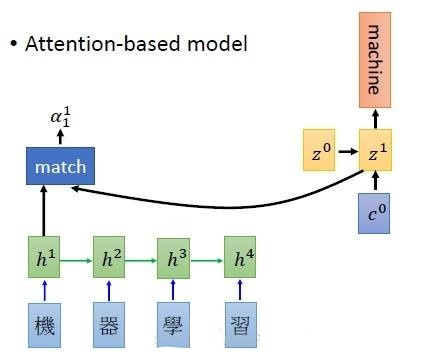
  
# 03 语音识别的应用与开发工具
## 3.1 语音识别的应用
- 关键词检出（KWS，Keyword Spotting）、唤醒词检测（Wake-up Word Detection，WUW），比如天猫精灵、小爱同学、hey sari、你好小娜；
- 声纹检测（VR，Voiceprint Recognition）、说话人识别 （SR，Speaker Recognition），比如hey sari只能被手机主人唤醒；
- 语音识别（SR，Speech Recognition）、语种识别（Spoken Language Recognition）、情绪识别（Spoken Emotion Recognition, SER），比如输入法的文字输入，与sari、天猫精灵交流等；
- 语音合成（TTS，Text To Speech），将sari、天猫精灵的回复通过语音的形式播放；

## 3.2 语音识别的开发工具
#### 深度学习平台

| 平台名称                   | 初始开发者            | 主要特点                |
| ------------------------ | ------------------------ | ------------------- |
| TensorFlow |Google | 高效的产品部署，已集成Keras    |
| PyTorch |Facebook |  动态图、适合科研，已集成Caffe2  |
| MXNet | Apache软件基金会 | 可扩展性强，Amazon云支持    |
| CNTK | Microsoft |  Azure云集成简单    |
| PaddlePaddle | 百度  |  模型库丰富，官方支持       |

#### 语音识别开发工具
| 工具名称      | 依托的深度学习平台    | 支持的模型结构    |
| ----------- | ---------------- | ---------------- |
| mozilla/DeepSpeech |TensorFlow | RNN+CTC    |
| kaldi-asr/kaldi |- |  GMM/CNN/LSTM/TDNN-HMM/LF-MMI/RNNLM  |
| facebook-research/wav2letter | - | CTC/Attention/AutoSegCriterion    |
| espnet| Chainer/PyTorch |  CTC/Attention/DNN-HMM/RNN-T    |
| NVDIA/OpenSeq2Seq | Tensorflow  | CTC/Attention    |


# 04 语音识别相关开源学习资料
## 4.1 开源数据集
- [清华中文语音数据集THCHS-30]( http://www.openslr.org/18/)
- [希尔贝壳中文普通话语音数据库AISHELL-2](http://www.aishelltech.com/aishell_2)
- [中国明星声纹数据集 CN-Celeb2](https://mp.weixin.qq.com/s/pvXzhROkEMUBplrGCatwlQ)
- [kaldi中免费的数据集（中文跟英文）](https://mp.weixin.qq.com/s/JXGbA1TNo8VELtY11E-U7g)
- [Google发布的语音分离数据集](https://github.com/google-research/sound-separation/blob/master/datasets/fuss/FUSS_license_doc/README.md)
- [好未来开源近600小时中英文混合语音数据集](https://ai.100tal.com/dataset)
- [字节跳动发布全球最大钢琴MIDI数据集](https://github.com/bytedance/GiantMIDI-Piano)
- [中英文NLP数据集搜索库：CLUEDatasetSearch](https://github.com/CLUEbenchmark/CLUEDatasetSearch)
## 4.2 开源语音识别项目
- https://github.com/kaldi-asr/kaldi
- https://github.com/SeanNaren/deepspeech.pytorch
- https://github.com/srvk/eesen
- https://github.com/Uberi/speech_recognition
- https://github.com/xxbb1234021/speech_recognition

# 参考资料
- [李宏毅_深度学习_语音识别（2020最新版）](https://www.bilibili.com/video/BV1q5411V7tT?from=search&seid=12040901239852711150)
- [清语赋. 语音识别基本法](https://mp.weixin.qq.com/mp/appmsgalbum?__biz=MzI2MzU4NDI4NA==&action=getalbum&album_id=1472128841614753794&scene=173&from_msgid=2247484113&from_itemidx=1&count=3#wechat_redirect)
- [【概率图模型】 那些的你不知道的事 ](https://mp.weixin.qq.com/s/rVhD5Jh7HxoO_5QuZjrk1w)
- [语音信号处理](https://blog.csdn.net/mandagod/article/details/92655343?ivk_sa=1024320u)
- [传统语音识别（GMM+HMM）](https://www.jianshu.com/p/16fc3712fdf6)
- [GMM-HMM语音识别模型原理篇](https://blog.csdn.net/abcjennifer/article/details/27346787)
- [马尔可夫链和隐马尔可夫模型](https://www.jianshu.com/p/a6e3e79bed6a)
- [语音识别中的CTC算法的基本原理解释](https://blog.csdn.net/luodongri/article/details/80100297)
- [Attention在语音识别中的应用](https://blog.csdn.net/quheDiegooo/article/details/76890128?ivk_sa=1024320u)
- [深度学习中的attention机制](https://blog.csdn.net/guohao_zhang/article/details/79540014)
- [【深度学习】Attention机制](https://nd.mbd.baidu.com/r/jCFmhEWZXO?f=cp&u=1c949fe9b22af759)
- [语音交互评价指标](https://blog.csdn.net/acelit/article/details/100973450)